In [3]:
import torch
import numpy as np

In [7]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [8]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [9]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7204, 0.1274],
        [0.0348, 0.3540]]) 



In [10]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
2
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")


Random Tensor: 
 tensor([[0.2254, 0.8912, 0.3584],
        [0.0361, 0.3714, 0.7159]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [11]:

tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [26]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


In [33]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [34]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [28]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.]]) 

tensor * tensor 
 tensor([[36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.]])


In [17]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [18]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [19]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [20]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [122]:
import torch
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [123]:
Q = 3*a**3 - b**2

In [124]:
import numpy as np
import torch

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


#### task 1

In [48]:
x1 = torch.tensor([2., 3.], requires_grad=True)
x2 = torch.tensor([6., 4.], requires_grad=True)

Q = (3*x1 - 2*x2 - 2)**2

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

print(3*x1**2 == x1.grad)
print(-2*x2 == x2.grad)

tensor([False, False])
tensor([False, False])


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # 784 is the input dimension, and 68 is the output dimenstion of the first hidden layer
        
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4= nn.Linear(64, 10)
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
params = list(net.parameters())
print(len(params))
for p in params:
    print(p.size())

8
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [10]:
input = torch.randn(1, 784)
out = net(input)
print(out)

tensor([[-0.0038,  0.0129,  0.0014,  0.0844, -0.0474, -0.1092,  0.1090,  0.0761,
          0.0315, -0.1299]], grad_fn=<AddmmBackward0>)


In [11]:
import torch.optim as optim
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [12]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
training_data = datasets.MNIST(
root="data",
train=True,
download=True,
transform=ToTensor()
)
test_data = datasets.MNIST(
root="data",
train=False,
download=True,
transform=ToTensor()
)

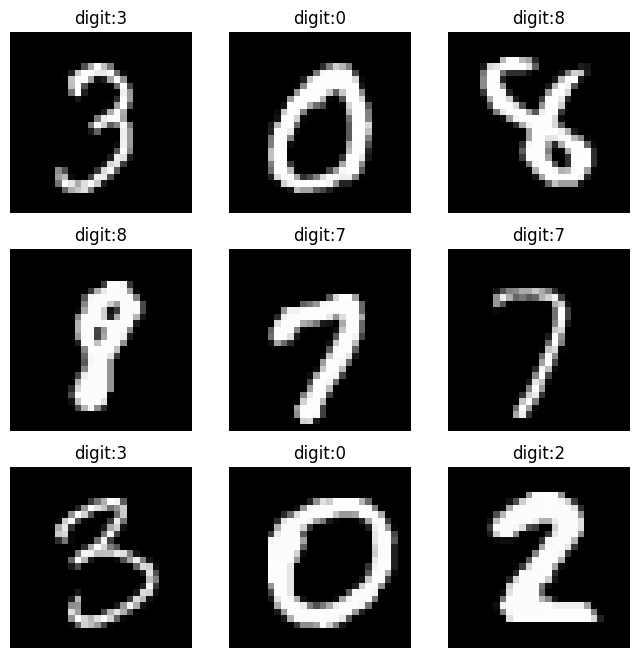

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title("digit:" + str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [14]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


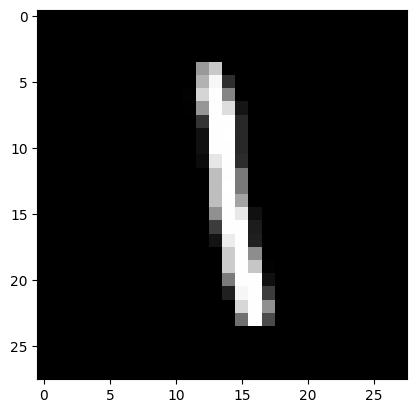

Label: 1


In [15]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [16]:
import torch
if torch.cuda.is_available():
    print("cuda is available")


print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))


cuda is available
1
NVIDIA GeForce RTX 3070 Laptop GPU


In [26]:

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(5): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [18]:
PATH = './my_net.pth'
torch.save(net.state_dict(), PATH)

In [19]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(torch.flatten(images,1))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 97 %


In [21]:
device = torch.device('cuda:0'if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [24]:
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [33]:
inputs, labels = data[0].to(device), data[1].to(device)

In [28]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(5): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.073
[1,  4000] loss: 0.071
[1,  6000] loss: 0.079
[1,  8000] loss: 0.068
[1, 10000] loss: 0.065
[1, 12000] loss: 0.070
[1, 14000] loss: 0.081
[2,  2000] loss: 0.055
[2,  4000] loss: 0.069
[2,  6000] loss: 0.075
[2,  8000] loss: 0.070
[2, 10000] loss: 0.062
[2, 12000] loss: 0.078
[2, 14000] loss: 0.072
[3,  2000] loss: 0.055
[3,  4000] loss: 0.065
[3,  6000] loss: 0.051
[3,  8000] loss: 0.069
[3, 10000] loss: 0.068
[3, 12000] loss: 0.062
[3, 14000] loss: 0.068
[4,  2000] loss: 0.048
[4,  4000] loss: 0.054
[4,  6000] loss: 0.060
[4,  8000] loss: 0.071
[4, 10000] loss: 0.066
[4, 12000] loss: 0.055
[4, 14000] loss: 0.054
[5,  2000] loss: 0.048
[5,  4000] loss: 0.053
[5,  6000] loss: 0.062
[5,  8000] loss: 0.063
[5, 10000] loss: 0.071
[5, 12000] loss: 0.062
[5, 14000] loss: 0.054
Finished Training
